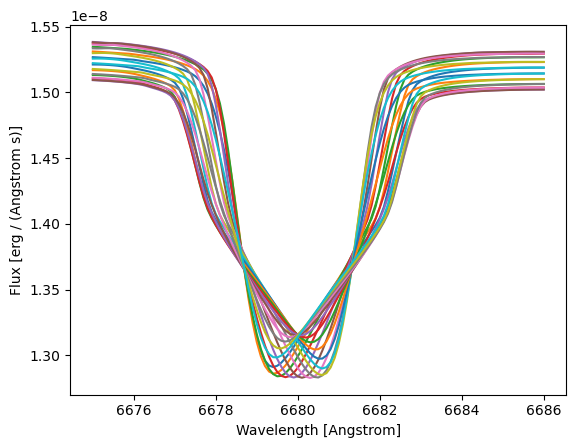

In [1]:
import matplotlib.pyplot as plt
import astropy.table as at

# Read and plot the spectra

plt.figure()

for i in range(20):

    # Read the flux

    tbl = at.Table.read(f'model-{i+1:03d}.ecsv')

    # Plot the flux

    plt.plot(tbl['wavelength'], tbl['flux'])

plt.xlabel(f'Wavelength [{tbl["wavelength"].unit}]')
plt.ylabel(f'Flux [{tbl["flux"].unit}]')

Text(0, 0.5, 'Flux [erg / (Angstrom cm^2 s)]')

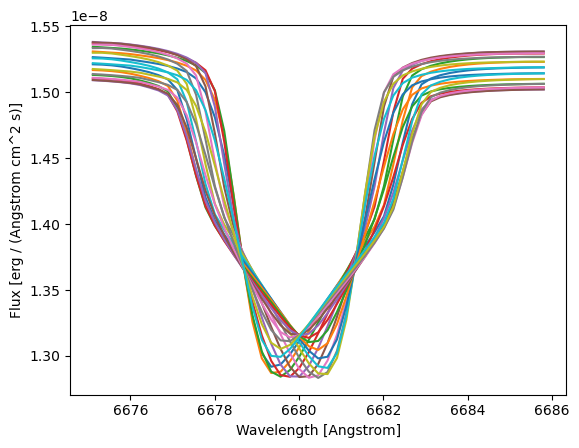

In [6]:
import pymsg as pm
import pykylie as pk
import numpy as np

# Load the specgrid

specgrid = pm.SpecGrid('sg-BSTAR2006-high.h5')

specgrid.cache_limit = 2048 # To improve performance

# Set up bin wavelengths -- uniformly spaced in Delta log(lambda) to yield
# a constant resolving power

lam_min = 6675
lam_max = 6686
R = 30000

lam = np.exp(np.arange(start=np.log(lam_min), stop=np.log(lam_max), step=1/R))

# Set up mid-point wavelengths

lam_mid = 0.5*(lam[1:] + lam[:-1])

# Calculate and plot the spectra

plt.figure()

for i in range(20):

    # Read the BRUCE model

    model = pk.read_bruce_model(f'model-{i+1:03d}')

    # Evaluate the flux

    flux = pk.integrate_flux(model, specgrid, lam, x_add={'Z/Zo': 1.0})

    # Plot the flux

    plt.plot(lam_mid, flux)

plt.xlabel('Wavelength [Angstrom]')
plt.ylabel('Flux [erg / (Angstrom cm^2 s)]')